map out the obstacles and the the target position
```bash
rostopic echo /map -n 1 >> test.txt
```

{'obstacles': [{'header': {'seq': 0, 'stamp': {'secs': 1715864185, 'nsecs': 900182477}, 'frame_id': 'base_link'}, 'point': {'x': -0.0992352557182, 'y': -0.469501852989, 'z': 0.08}}, {'header': {'seq': 0, 'stamp': {'secs': 1715864185, 'nsecs': 900182477}, 'frame_id': 'base_link'}, 'point': {'x': -0.0941094201803, 'y': -0.479287445545, 'z': 0.08}}, {'header': {'seq': 0, 'stamp': {'secs': 1715864185, 'nsecs': 900182477}, 'frame_id': 'base_link'}, 'point': {'x': -0.0861366283894, 'y': -0.482522308826, 'z': 0.08}}, {'header': {'seq': 0, 'stamp': {'secs': 1715864185, 'nsecs': 900182477}, 'frame_id': 'base_link'}, 'point': {'x': -0.0781113249063, 'y': -0.485624581575, 'z': 0.08}}, {'header': {'seq': 0, 'stamp': {'secs': 1715864185, 'nsecs': 900182477}, 'frame_id': 'base_link'}, 'point': {'x': -0.0707102161646, 'y': -0.490476250648, 'z': 0.08}}, {'header': {'seq': 0, 'stamp': {'secs': 1715864185, 'nsecs': 900182477}, 'frame_id': 'base_link'}, 'point': {'x': -0.0644847792387, 'y': -0.4990029335

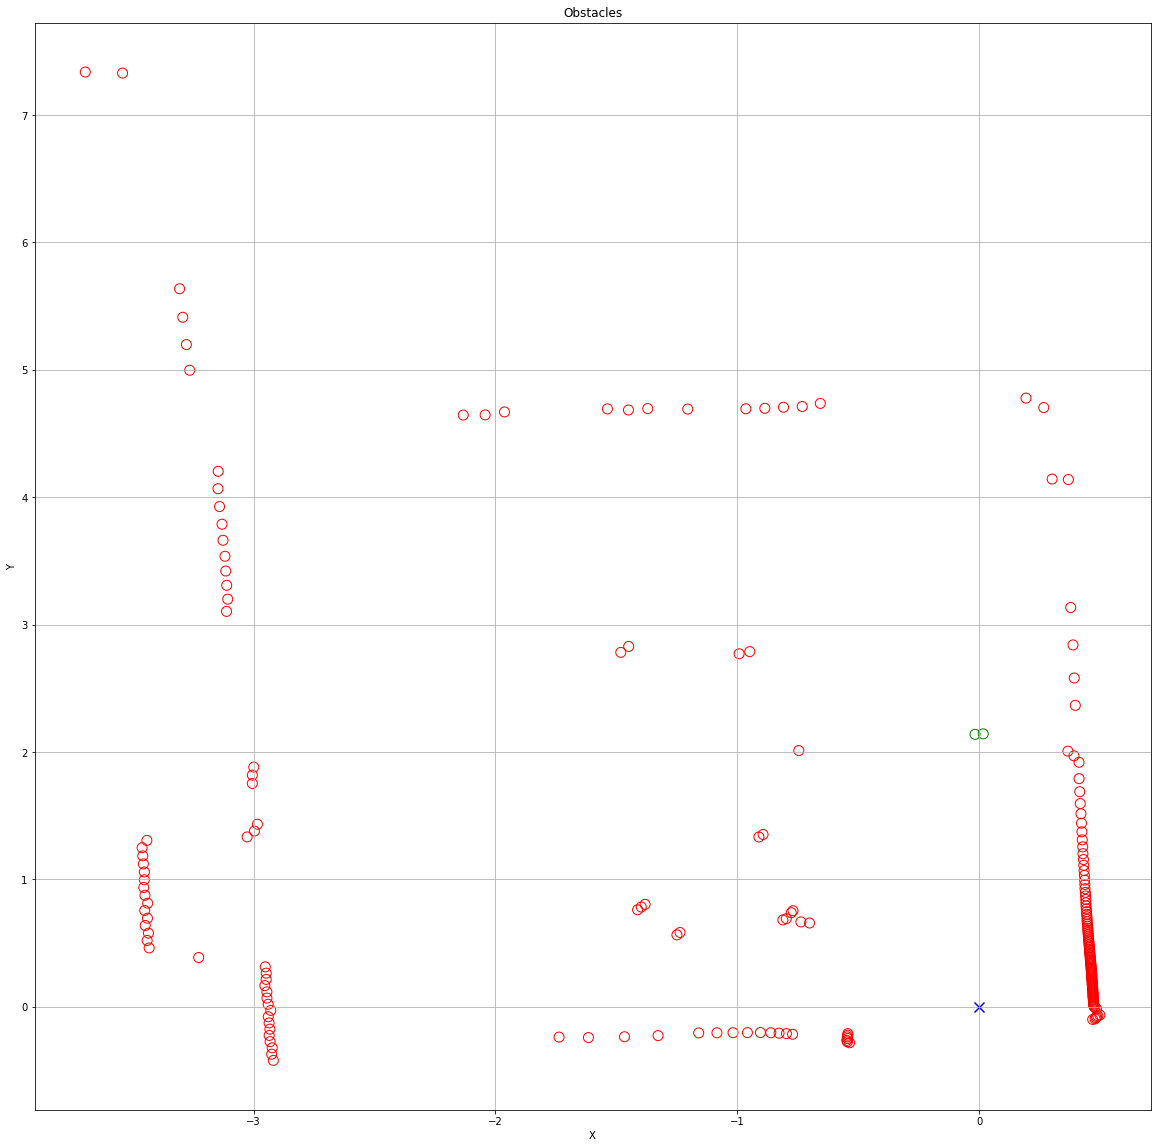

In [15]:
import yaml
import matplotlib.pyplot as plt

def read_obstacles(file_path):
    obstacles = []
    goal = []
    with open(file_path, 'r') as file:
        for data in yaml.safe_load_all(file):
            if data is None:
                continue
            print(data)
            if data['goal'] :
                goal = ([(goal['point']['x'], goal['point']['y'], goal['point']['z']) for goal in data['goal']])
            if data['obstacles'] :
                obstacles = ([(obstacle['point']['x'], obstacle['point']['y'], obstacle['point']['z']) for obstacle in data['obstacles']])
    return obstacles, goal

def plot_obstacles(obstacles, goals):
    x_values = [-obstacle[1] for obstacle in obstacles]
    y_values = [obstacle[0] for obstacle in obstacles]
    x_values_goal = [-goal[1] for goal in goals]
    y_values_goal = [goal[0] for goal in goals]
    xval = []
    for x in obstacles:
        if(x[1] == 0): xval.append(x)
    print(len(xval))
    plt.figure(figsize=(20,20))
    plt.scatter(x_values, y_values, color='r', marker='o',s=100, facecolors='none')
    plt.scatter([0], [0], color='b', marker='x',s=100)
    plt.scatter(x_values_goal, y_values_goal, color='g', marker='o', s=100, facecolors='none')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Obstacles')
    plt.grid(True)
    plt.savefig("env_2.jpg")
    plt.show()

if __name__ == "__main__":
    file_path = "env_2.txt"
    obstacles, goal = read_obstacles(file_path)
    print(len(obstacles))
    print(len(goal))
    plot_obstacles(obstacles, goal)
